In [35]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url="pca_iris.data"     
df=pd.read_csv(url,names=['sepal lenght','sepal width','petal lenght','petal width','target'])
df

,sepal lenght,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
features=['sepal lenght','sepal width','petal lenght','petal width',]
# features are x now 
x=df[features]
y=df[['target']]


In [37]:
x_scaled=StandardScaler().fit_transform(x)
x_scaled



array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [38]:
pca=PCA(n_components=2)
principalcomponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalcomponents,columns = ['principal component 1','principal component 2'])
principalDf
# yeni iki tane boyut oluşturuyor bu boyut hiçbir anlam ifade etmiyor sadece matematiksel olarak 


,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [39]:
final_data_frame=pd.concat([principalDf,df[['target']]],axis=1)
final_data_frame

,principal component 1,principal component 2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


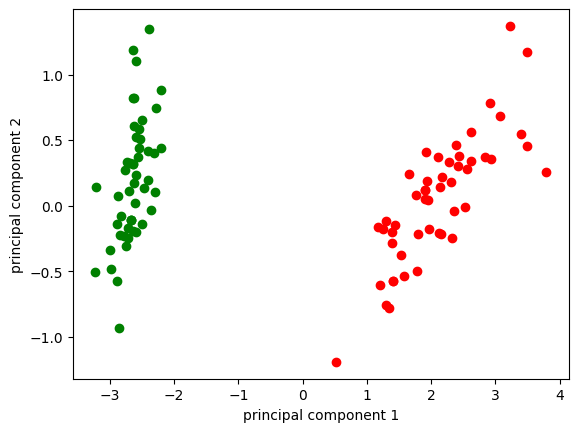

In [40]:
targets = ['Iris-setosa','Iris-versicolor  ','Iris-virginica']
colors = ['g', 'b', 'r']
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

for target, col in zip(targets, colors):
    dftemp = final_data_frame[final_data_frame['target'] == target]
    plt.scatter(dftemp['principal component 1'], dftemp['principal component 2'], color=col)



In [41]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [42]:
pca.explained_variance_ratio_.sum()

0.9776317750248035

In [43]:
#hacmi küçültüp variance kaybına uğratıyoruz sıkıştırma oranı yüzde 50 